In [ ]:
#@title Load Modules
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
diabetes=load_diabetes()
# see type
print('Type of data object: ',type(diabetes))
# see dataset info /docs
print(diabetes.DESCR)

In [ ]:
print('Shape of inputs: ',diabetes.data.shape)
print('Shape of dependent: ',diabetes.target.shape)
print('Features nams:', diabetes.feature_names)

Shape of inputs:  (442, 10)
Shape of dependent:  (442,)
Features nams: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
# creating a dataframe
X=diabetes.data
Y=diabetes.target
data1=pd.DataFrame(data=X,columns=diabetes.feature_names)
data1['Target']=Y  #diabetes.target
# see data head
data1.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


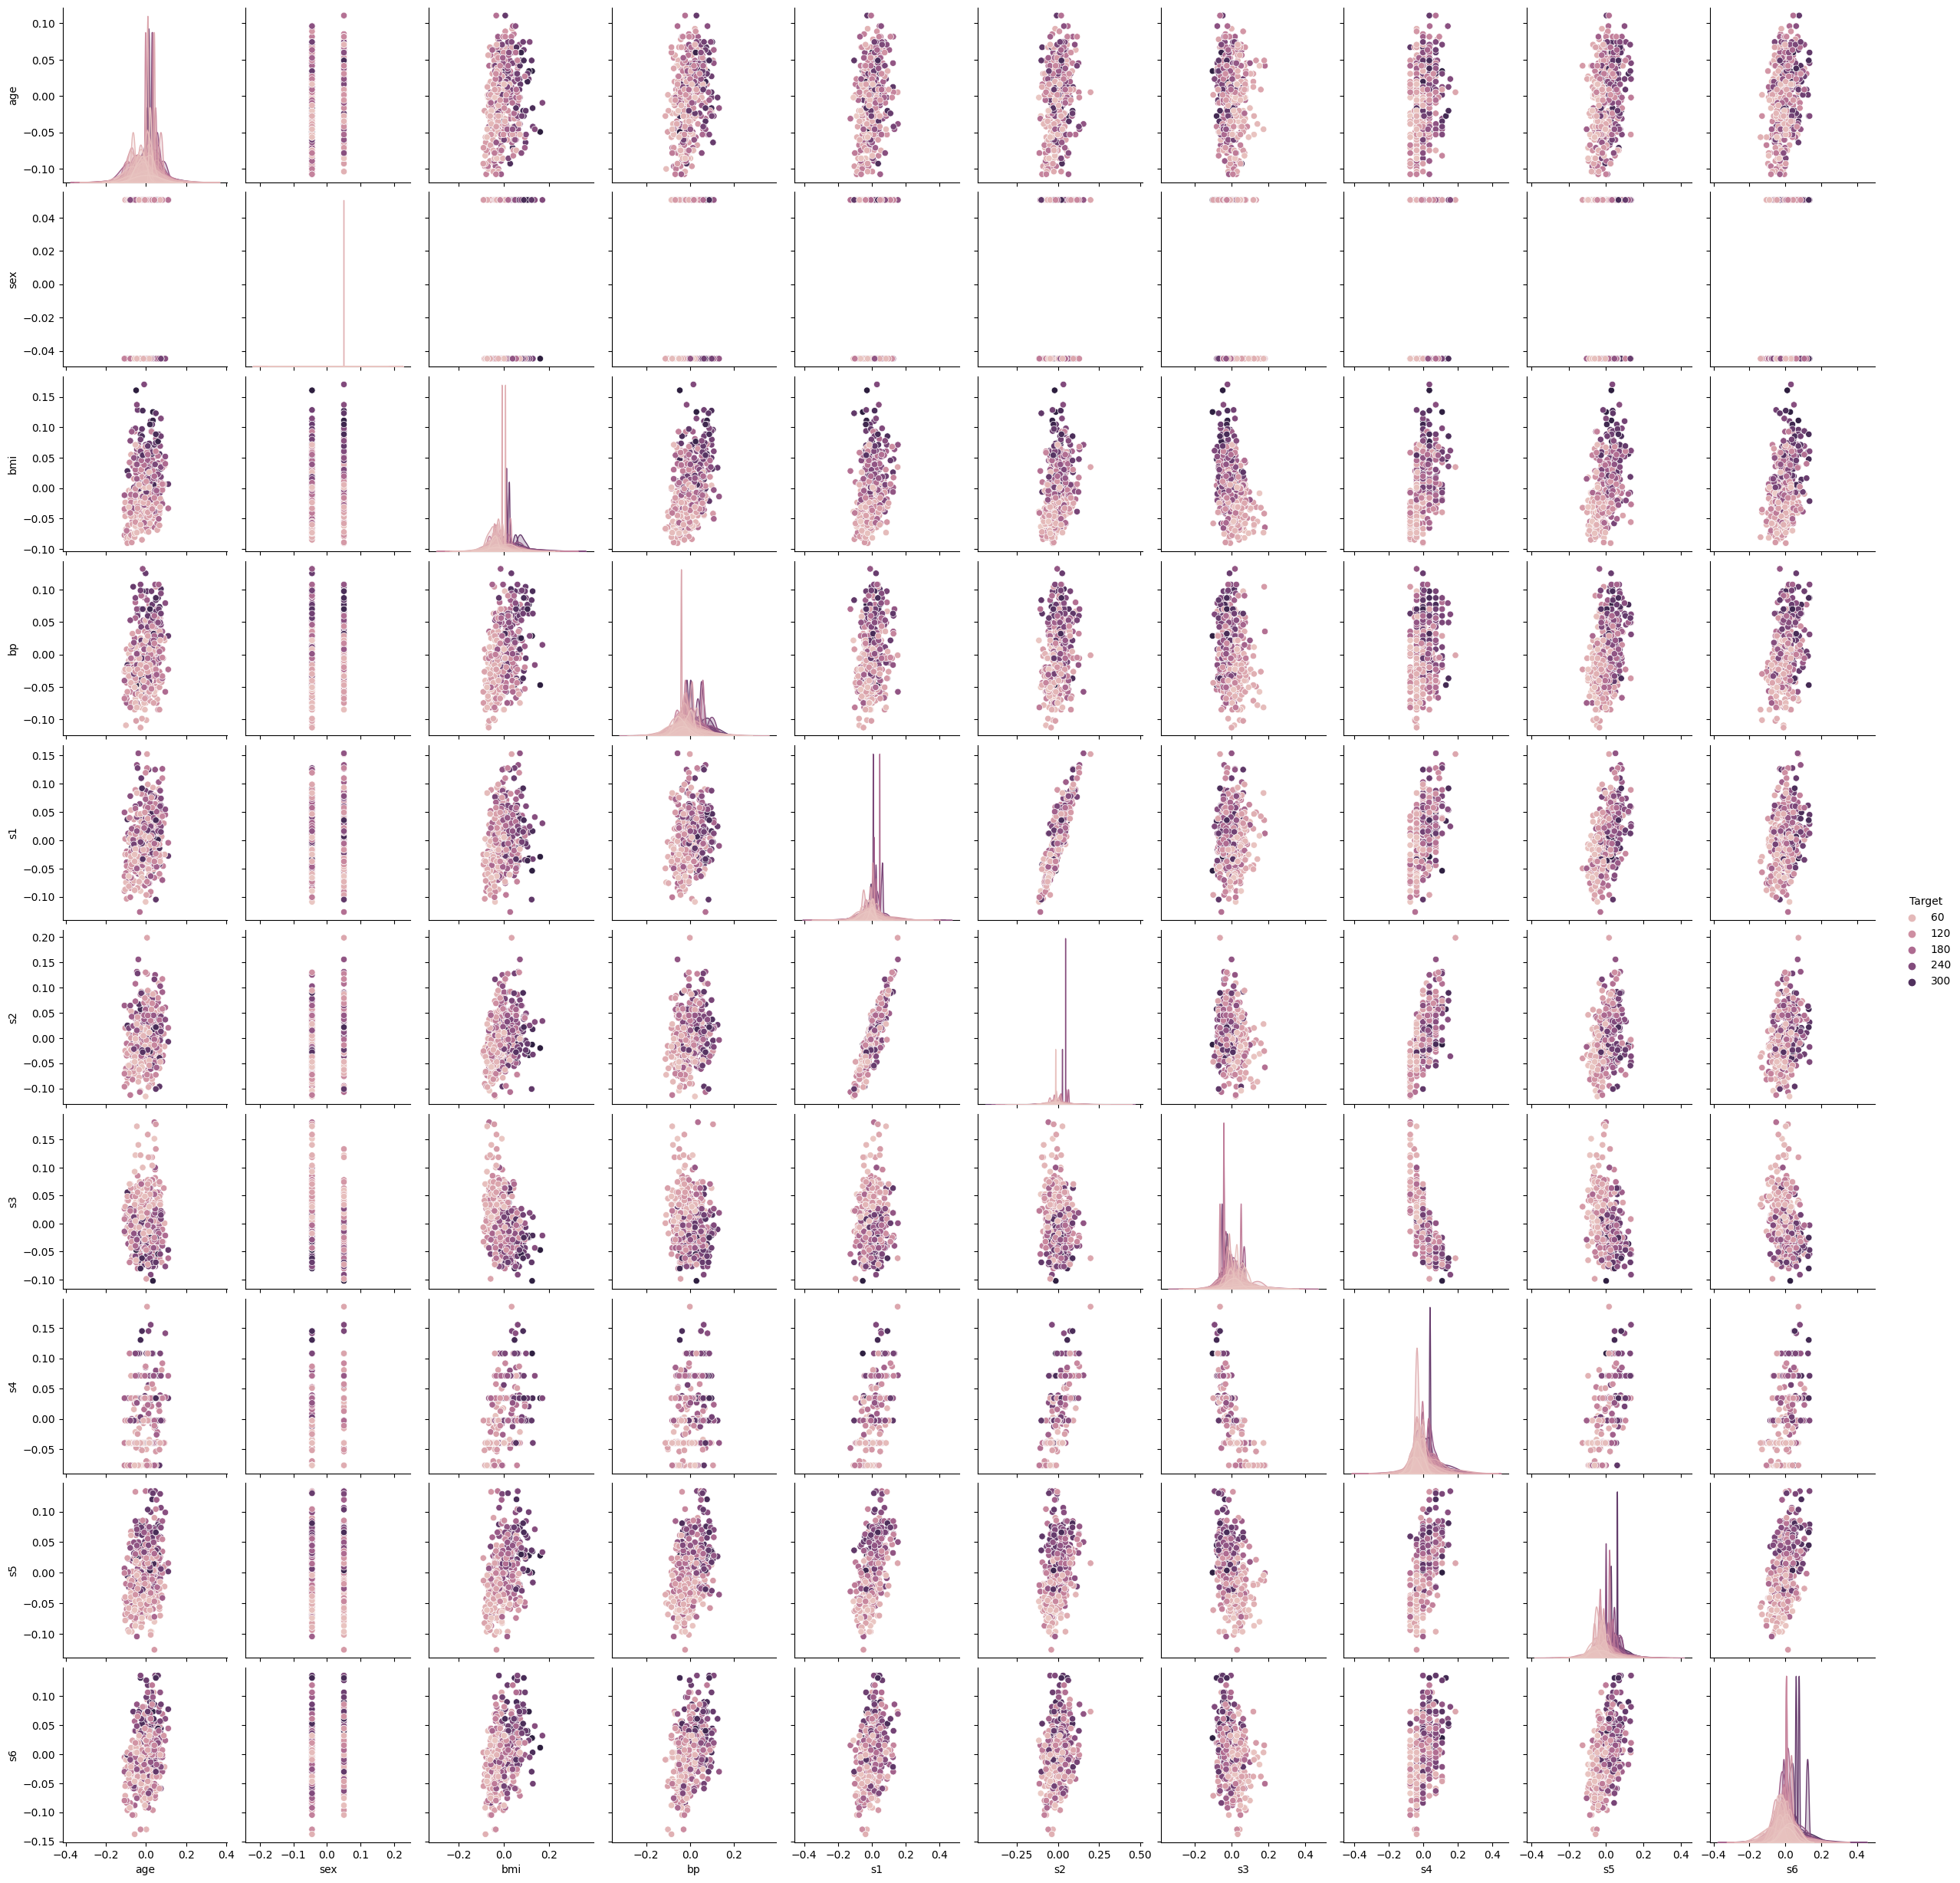

In [ ]:
# Pair plot
sns.pairplot(data1, vars=diabetes.feature_names, hue='Target')
plt.show()


In [ ]:
# make split (dataframe and series) (can also use numpy array)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(data1[diabetes.feature_names],data1['Target'],test_size=0.60)
Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape

((176, 10), (266, 10), (176,), (266,))

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = dict(criterion=['squared_error', 'friedman_mse', 'absolute_error', 'poisson'])

# Create a DecisionTreeRegressor model
regressor = DecisionTreeRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(regressor, param_grid,scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(diabetes.data, diabetes.target)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'criterion': 'friedman_mse'}
Best score: 0.009014300306435139


In [ ]:
cv_results=pd.DataFrame(grid_search.cv_results_)[['param_criterion','mean_test_score','rank_test_score']]
cv_results.sort_values('rank_test_score',inplace=True)
print(cv_results.head())

  param_criterion  mean_test_score  rank_test_score
1    friedman_mse         0.009014                1
3         poisson         0.002247                2
0   squared_error         0.000000                3
2  absolute_error         0.000000                3


In [ ]:
regressor.fit(Xtrain, Ytrain)
y_pred =regressor.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score
a=accuracy_score(Ytest,y_pred)
print(a)


0.011278195488721804
